# Random Data Sampling:

### Oversampling:

In [28]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

x, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)

print(Counter(y))
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)

print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


In [29]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

x, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)

steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F-measure: %.3f' % score)

F-measure: 0.983


### Undersampling:

In [30]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

x, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)

print(Counter(y))

undersample = RandomUnderSampler(sampling_strategy='majority')

x_over, y_over = undersample.fit_resample(x, y)

print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


In [31]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

x, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)

steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F-measure: %.3f' % score)

F-measure: 0.930


# Oversampling Methods:

### Synthetic minority oversampling technique (SMOTE):

Counter({0: 9900, 1: 100})


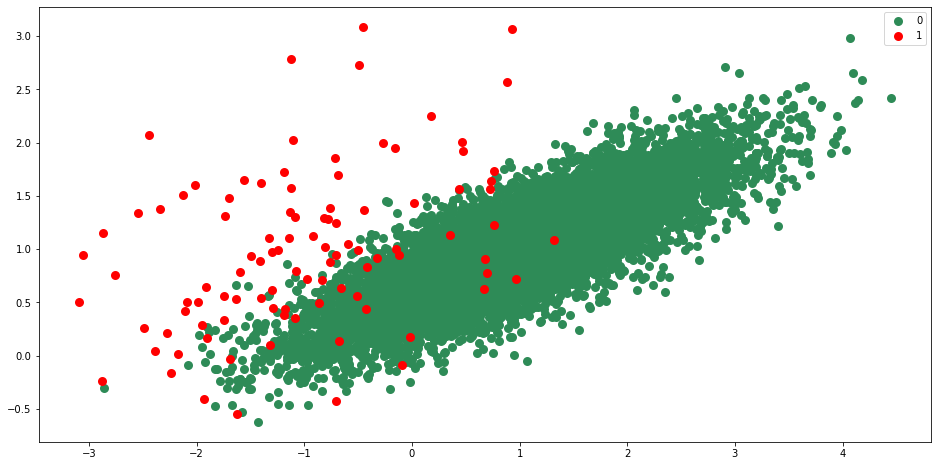

In [32]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

x, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    
    plt.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


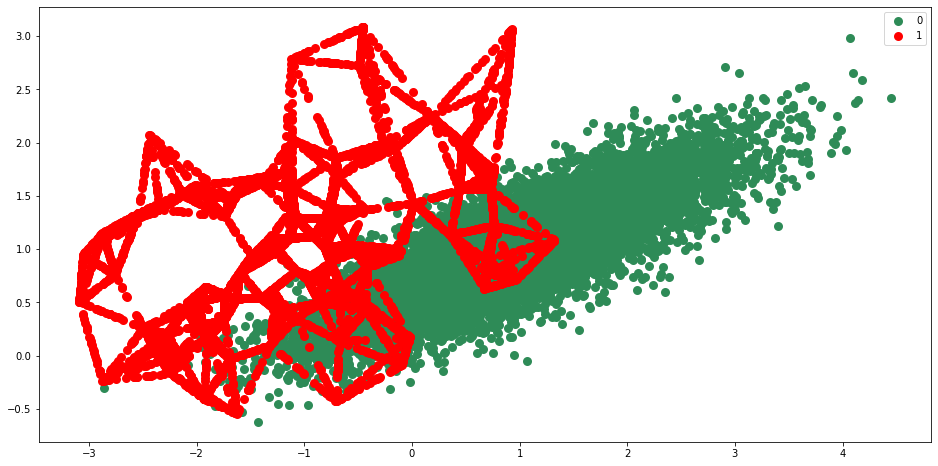

In [33]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

x, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    
    plt.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

In [34]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

x, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.776


In [35]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline

x, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.826


In [36]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

x, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

k_values = [1, 2, 3, 4, 5, 6, 7]

for k in k_values:
    model = DecisionTreeClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    pipeline = Pipeline(steps=[('over', over), ('model', model)])

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.772
> k=2, Mean ROC AUC: 0.802
> k=3, Mean ROC AUC: 0.796
> k=4, Mean ROC AUC: 0.813
> k=5, Mean ROC AUC: 0.812
> k=6, Mean ROC AUC: 0.813
> k=7, Mean ROC AUC: 0.811


### Borderline SMOTE:

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


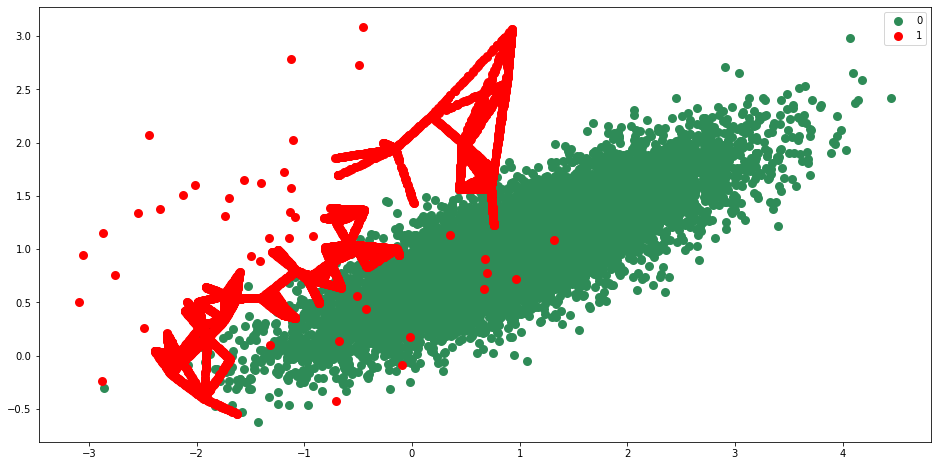

In [37]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
import matplotlib.pyplot as plt

import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

### SVM SMOTE:

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


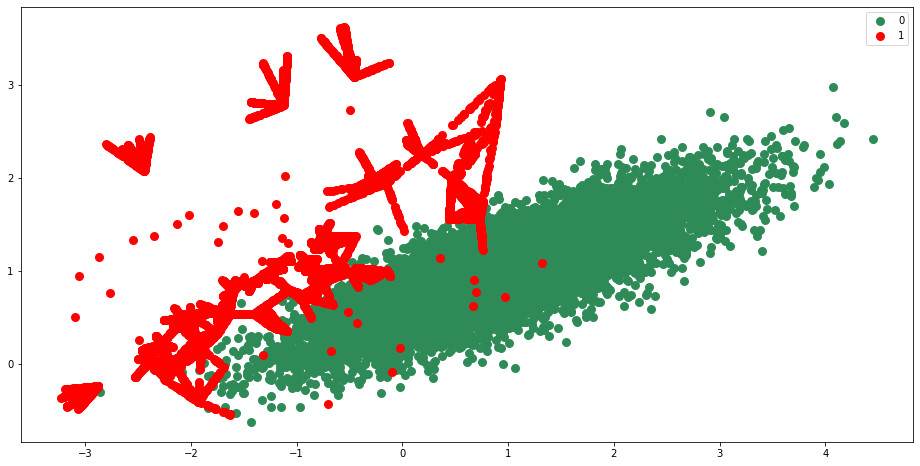

In [38]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
import matplotlib.pyplot as plt

import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

### Adaptive Synthetic Sampling (ADASYN):

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


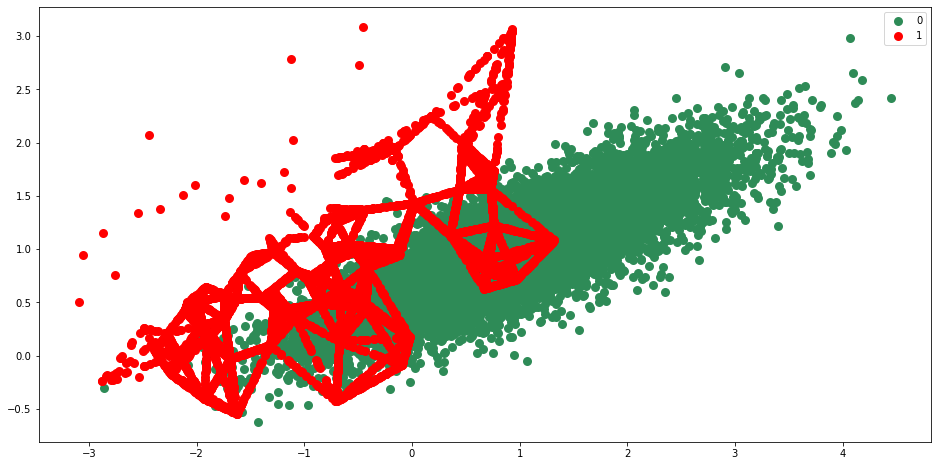

In [39]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt

import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

oversample = ADASYN()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

# Undersampling Methods:

## Methods that select examples to keep:

### "Near Miss" undersampling:

Counter({0: 9900, 1: 100})


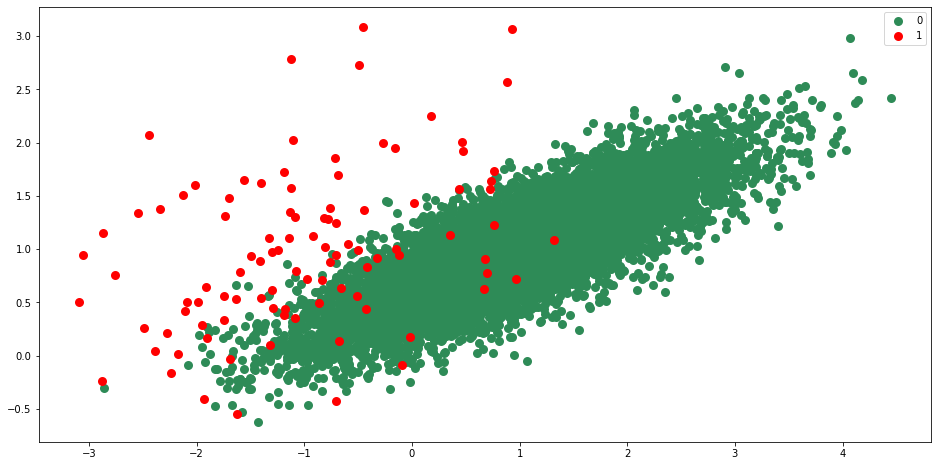

In [44]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


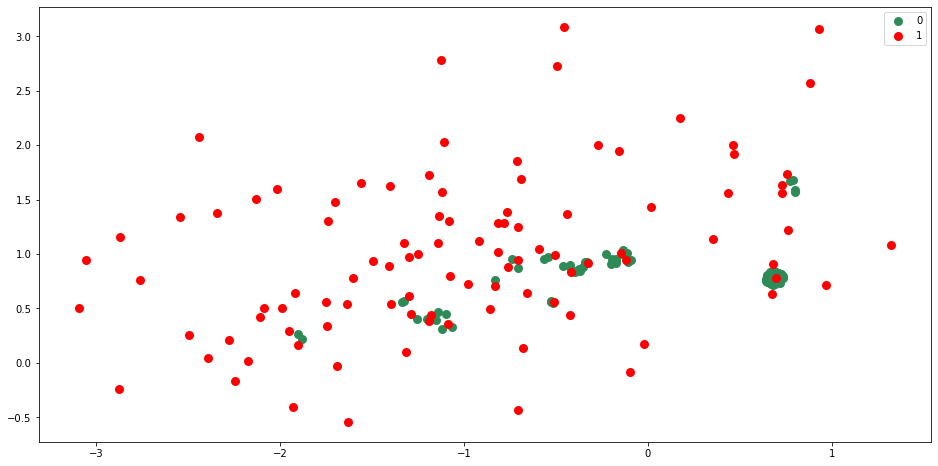

In [45]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot

import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

undersample = NearMiss(version=1, n_neighbors=3)

X, y = undersample.fit_resample(X, y)
counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


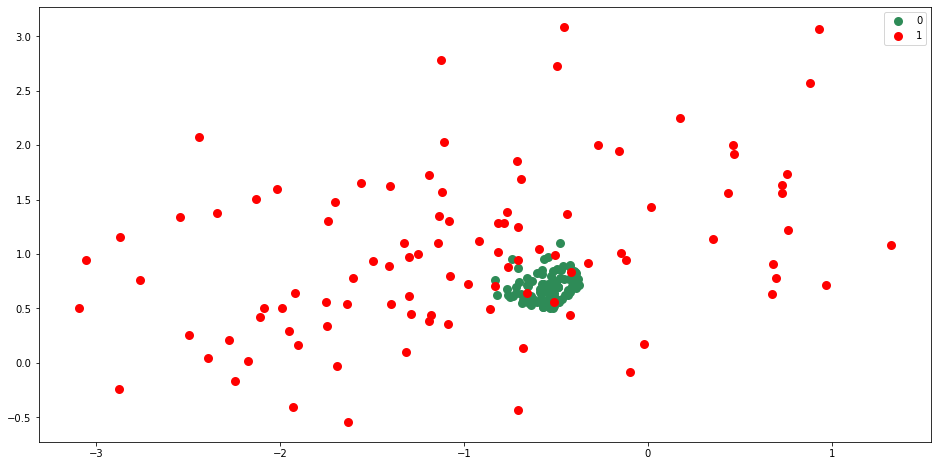

In [46]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot

import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

undersample = NearMiss(version=2, n_neighbors=3)

X, y = undersample.fit_resample(X, y)
counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


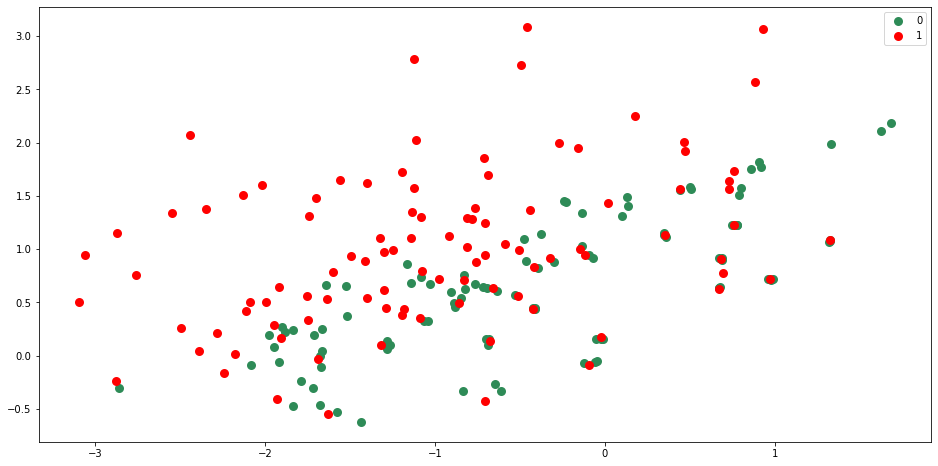

In [47]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot

import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

undersample = NearMiss(version=3, n_neighbors=3)

X, y = undersample.fit_resample(X, y)
counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

Counter({0: 9900, 1: 100})
Counter({0: 188, 1: 100})


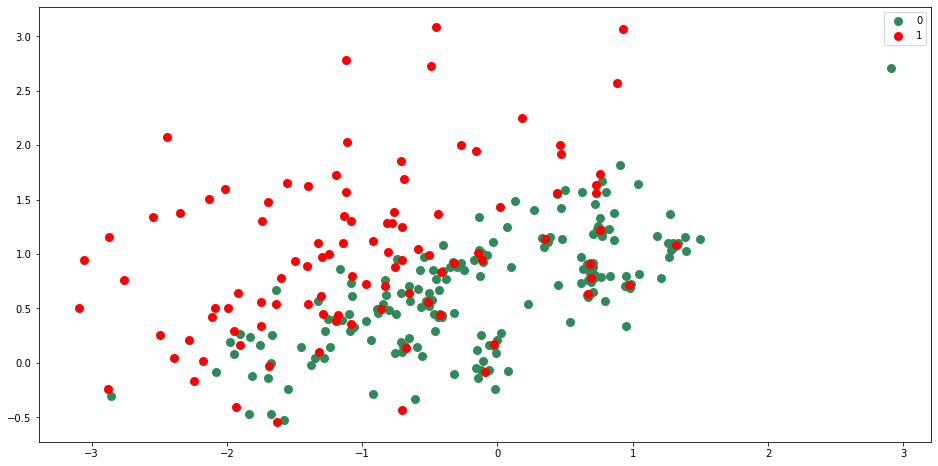

In [48]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import CondensedNearestNeighbour
from matplotlib import pyplot

import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

undersample = CondensedNearestNeighbour(n_neighbors=1)

X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

## Methods that select examples to delete:

### "Tomek Links" for undersampling:

Counter({0: 9900, 1: 100})
Counter({0: 9874, 1: 100})


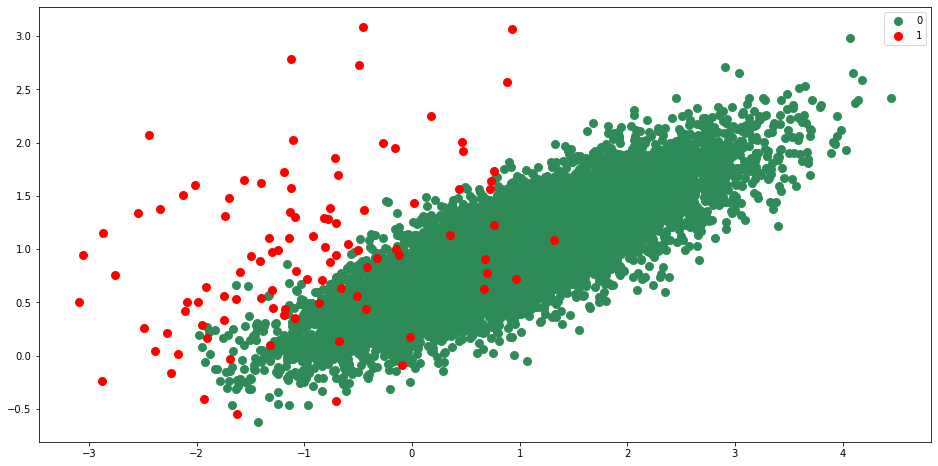

In [49]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks
from matplotlib import pyplot

import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

undersample = TomekLinks()

X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

### Edited Nearest Neighbors Rule for Undersampling:

Counter({0: 9900, 1: 100})
Counter({0: 9806, 1: 100})


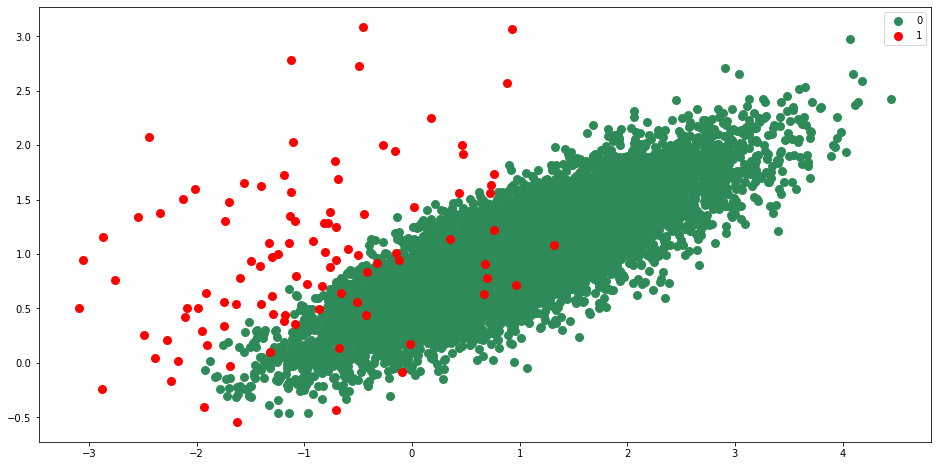

In [50]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import EditedNearestNeighbours
from matplotlib import pyplot

import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

undersample = EditedNearestNeighbours(n_neighbors=3)

X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

## Combinations of keep and delete Methods:

### One-Sided Selection for Undersampling:

Counter({0: 9900, 1: 100})
Counter({0: 959, 1: 100})


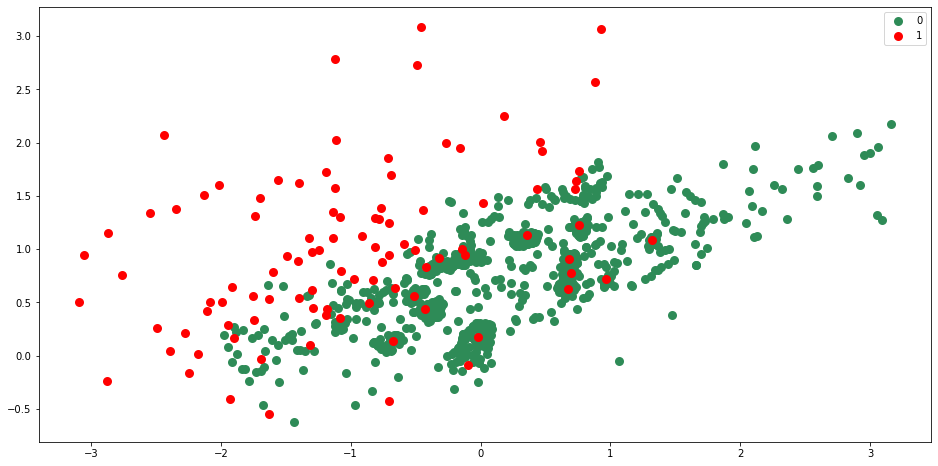

In [51]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import OneSidedSelection
from matplotlib import pyplot

import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)

X, y = undersample.fit_resample(X, y)
counter = Counter(y)

print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

### Neighborhood Cleaning Rule for Undersampling:

Counter({0: 9900, 1: 100})
Counter({0: 9786, 1: 100})


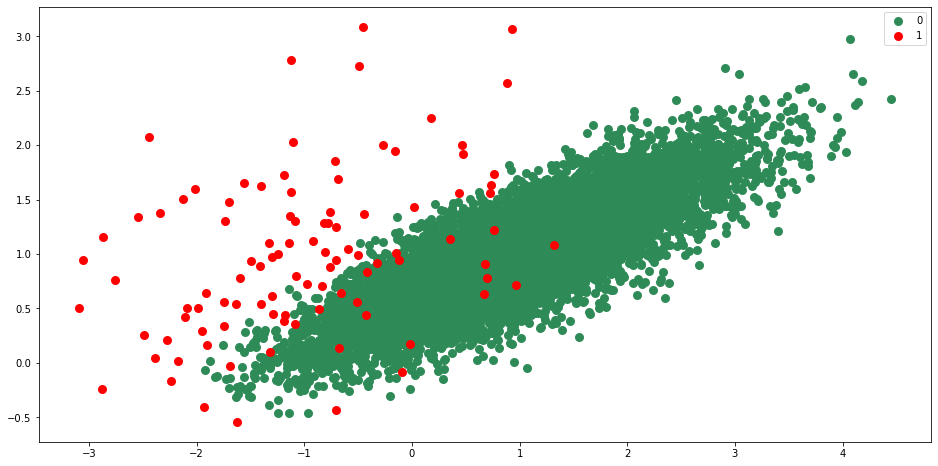

In [52]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NeighbourhoodCleaningRule
from matplotlib import pyplot

import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)

X, y = undersample.fit_resample(X, y)
counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

# Oversampling and Undersampling:

## Binary test problem & "Decision Tree" model:

Counter({0: 9900, 1: 100})


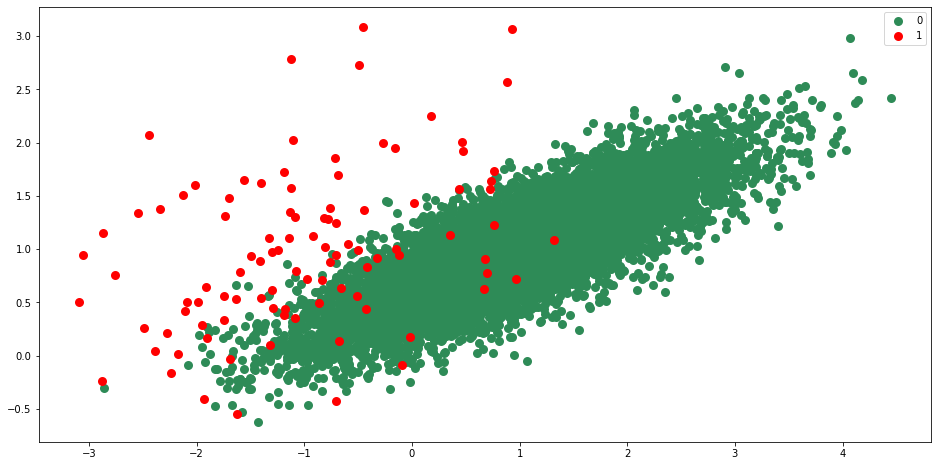

In [53]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

In [54]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold


X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.767


## Manually combine data sampling methods:

### Random Oversampling and Undersampling:

In [55]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
 
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, RandomUnderSampler


X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

model = DecisionTreeClassifier()

over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

pipeline = Pipeline(steps=[('o', over), ('u', under), ('m', model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

ImportError: cannot import name 'RandomUnderSampler' from 'imblearn.over_sampling' (C:\Users\talk2_000\anaconda3\lib\site-packages\imblearn\over_sampling\__init__.py)

### "SMOTE" & Random undersampling:

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

model = DecisionTreeClassifier()

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

## Standard combined data sampling methods:

### "SMOTE" & "Tomek Links" undersampling:

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

model = DecisionTreeClassifier()

resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

pipeline = Pipeline(steps=[('r', resample), ('m', model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

### "SMOTE" & "Edited Nearest Neighbors" undersampling:

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

model = DecisionTreeClassifier()
resample = SMOTEENN()

pipeline = Pipeline(steps=[('r', resample), ('m', model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))